<a href="https://colab.research.google.com/github/Indrejue/Build-week-1/blob/master/Healthcare_build_week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the libraries needed for preparing the information
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.pyplot import figure
plt.style.use('dark_background')#because i like dark mode

In [ ]:
ranking = pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/Ranking%20additions.csv')
ranking.head()

,Country Name,GDP total rank,GDP per capita Rank,year achieved universal health care,Type of system,healthcare Rank,population 2020
0,Andorra,162,27,NaN,NaN,4.0,77.265
1,Argentina,24,69,NaN,NaN,75.0,45195.774
2,Australia,13,13,1975.0,Two Tier,32.0,25499.884
3,Austria,26,17,1967.0,Insurance Mandate,9.0,9006.398
4,Belgium,23,22,1945.0,Insurance Mandate,21.0,11589.623


In [ ]:
#convert systems of ranking into 4 indicators
ranking['Type of system']= ranking['Type of system'].replace({np.NaN:0, 'Single Payer':1,'Two-Tier':2,'Two Tier':2,'Insurance Mandate':3})
ranking.head()

,Country Name,GDP total rank,GDP per capita Rank,year achieved universal health care,Type of system,healthcare Rank,population 2020
0,Andorra,162,27,NaN,0,4.0,77.265
1,Argentina,24,69,NaN,0,75.0,45195.774
2,Australia,13,13,1975.0,2,32.0,25499.884
3,Austria,26,17,1967.0,3,9.0,9006.398
4,Belgium,23,22,1945.0,3,21.0,11589.623


In [ ]:
#import the variouse csv files to begin minipulating and ploting graphs
per_cap_spend = pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/WDIData%20health%20spending%20per%20capita.csv')
per_gdp_spend = pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/WDIData%20health%20spending%20gdp.csv')
tax_of_gdp = pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/WDIData%20health%20Tax%20revenue.csv')
health_extenal_spend_percent= pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/WDIData%20health%20external%20spend%20percent%20of%20health.csv',)
health_gov_spend_percent = pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/WDIData%20health%20gov%20spend%20percent%20of%20health.csv')
health_prvt_spend_percent = pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/WDIData%20health%20private%20spend%20percent%20of%20health.csv')
death_per_1k = pd.read_csv('https://raw.githubusercontent.com/Indrejue/Build-week-1/master/WDIData%20health%20total%20death%20rate%20per%201000.csv')


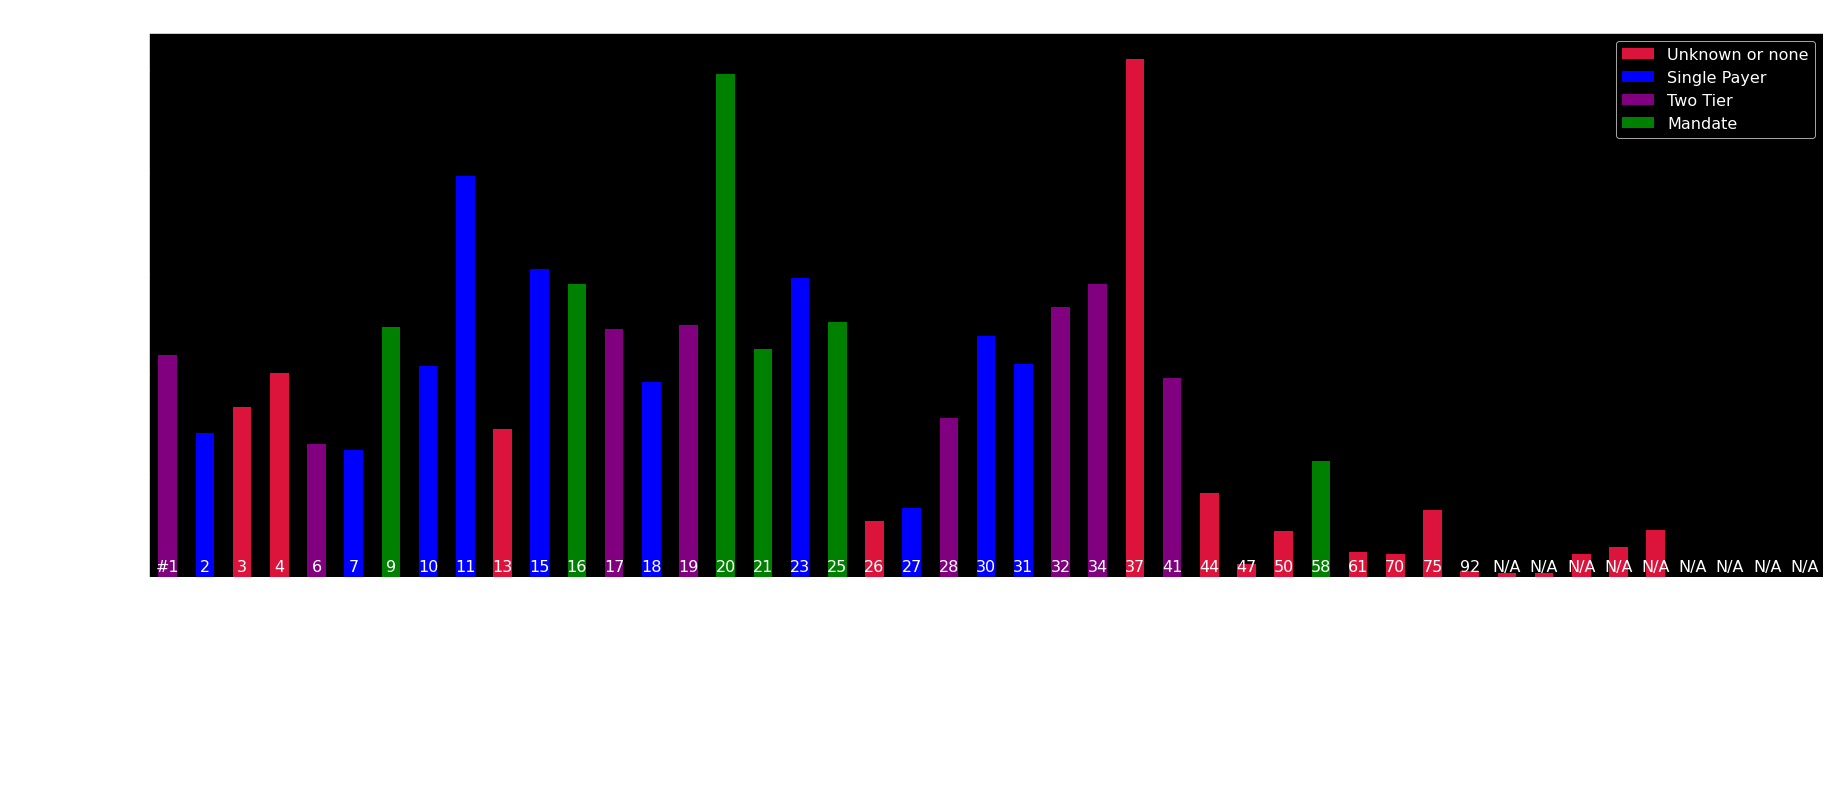

In [ ]:
#create the first visual using the 2017 per cap spending compared with the type of system and health ranking
#make a new dataframe with the necisary data
vis1_df = ranking 
vis1_df['2017 cost per capita'] = per_cap_spend['2017']
#drop additional rows
vis1_df=vis1_df.drop(['GDP total rank','GDP per capita Rank','year achieved universal health care','population 2020'],axis=1)
# Sort by health ranking
vis1_df = vis1_df.sort_values(by=['healthcare Rank','2017 cost per capita'],axis=0,na_position='last')
vis1_df.head()
#initialize graph
#set grouping colors for the various bars
colors = {0:'crimson', 1:'blue', 2:'purple',3:'green'}
vis1_df.plot(kind='bar',x=('Country Name'),y='2017 cost per capita',color=vis1_df['Type of system'].replace(colors)).legend([Patch(facecolor=colors[0]),Patch(facecolor=colors[1]),Patch(facecolor=colors[2]),Patch(facecolor=colors[3])], ['Unknown or none', 'Single Payer','Two Tier','Mandate'],fontsize=16)
# Resizing the graph to make it ledgible
plt.rcParams["figure.figsize"] = (30,10)
# Labeling the rank of each country
plt.text(x=-1,y=100,s='Health Ranking',horizontalalignment='right', fontsize=16)
plt.text(x=0,y=100,s='#1',horizontalalignment='center', fontsize=16)
plt.text(x=1,y=100,s='2',horizontalalignment='center', fontsize=16)
plt.text(x=2,y=100,s='3',horizontalalignment='center', fontsize=16)
plt.text(x=3,y=100,s='4',horizontalalignment='center', fontsize=16)
plt.text(x=4,y=100,s='6',horizontalalignment='center', fontsize=16)
plt.text(x=5,y=100,s='7',horizontalalignment='center', fontsize=16)
plt.text(x=6,y=100,s='9',horizontalalignment='center', fontsize=16)
plt.text(x=7,y=100,s='10',horizontalalignment='center', fontsize=16)
plt.text(x=8,y=100,s='11',horizontalalignment='center', fontsize=16)
plt.text(x=9,y=100,s='13',horizontalalignment='center', fontsize=16)
plt.text(x=10,y=100,s='15',horizontalalignment='center', fontsize=16)
plt.text(x=11,y=100,s='16',horizontalalignment='center', fontsize=16)
plt.text(x=12,y=100,s='17',horizontalalignment='center', fontsize=16)
plt.text(x=13,y=100,s='18',horizontalalignment='center', fontsize=16)
plt.text(x=14,y=100,s='19',horizontalalignment='center', fontsize=16)
plt.text(x=15,y=100,s='20',horizontalalignment='center', fontsize=16)
plt.text(x=16,y=100,s='21',horizontalalignment='center', fontsize=16)
plt.text(x=17,y=100,s='23',horizontalalignment='center', fontsize=16)
plt.text(x=18,y=100,s='25',horizontalalignment='center', fontsize=16)
plt.text(x=19,y=100,s='26',horizontalalignment='center', fontsize=16)
plt.text(x=20,y=100,s='27',horizontalalignment='center', fontsize=16)
plt.text(x=21,y=100,s='28',horizontalalignment='center', fontsize=16)
plt.text(x=22,y=100,s='30',horizontalalignment='center', fontsize=16)
plt.text(x=23,y=100,s='31',horizontalalignment='center', fontsize=16)
plt.text(x=24,y=100,s='32',horizontalalignment='center', fontsize=16)
plt.text(x=25,y=100,s='34',horizontalalignment='center', fontsize=16)
plt.text(x=26,y=100,s='37',horizontalalignment='center', fontsize=16)
plt.text(x=27,y=100,s='41',horizontalalignment='center', fontsize=16)
plt.text(x=28,y=100,s='44',horizontalalignment='center', fontsize=16)
plt.text(x=29,y=100,s='47',horizontalalignment='center', fontsize=16)
plt.text(x=30,y=100,s='50',horizontalalignment='center', fontsize=16)
plt.text(x=31,y=100,s='58',horizontalalignment='center', fontsize=16)
plt.text(x=32,y=100,s='61',horizontalalignment='center', fontsize=16)
plt.text(x=33,y=100,s='70',horizontalalignment='center', fontsize=16)
plt.text(x=34,y=100,s='75',horizontalalignment='center', fontsize=16)
plt.text(x=35,y=100,s='92',horizontalalignment='center', fontsize=16)
plt.text(x=36,y=100,s='N/A',horizontalalignment='center', fontsize=16)
plt.text(x=37,y=100,s='N/A',horizontalalignment='center', fontsize=16)
plt.text(x=38,y=100,s='N/A',horizontalalignment='center', fontsize=16)
plt.text(x=39,y=100,s='N/A',horizontalalignment='center', fontsize=16)
plt.text(x=40,y=100,s='N/A',horizontalalignment='center', fontsize=16)
plt.text(x=41,y=100,s='N/A',horizontalalignment='center', fontsize=16)
plt.text(x=42,y=100,s='N/A',horizontalalignment='center', fontsize=16)
plt.text(x=43,y=100,s='N/A',horizontalalignment='center', fontsize=16)
plt.text(x=44,y=100,s='N/A',horizontalalignment='center', fontsize=16)
#labeling Graph
plt.ylabel('US$ spent on Health',fontsize=20)
plt.xlabel('Country sorted from best to worst health rating',fontsize=20)
plt.title('Spending on health care per capita',fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

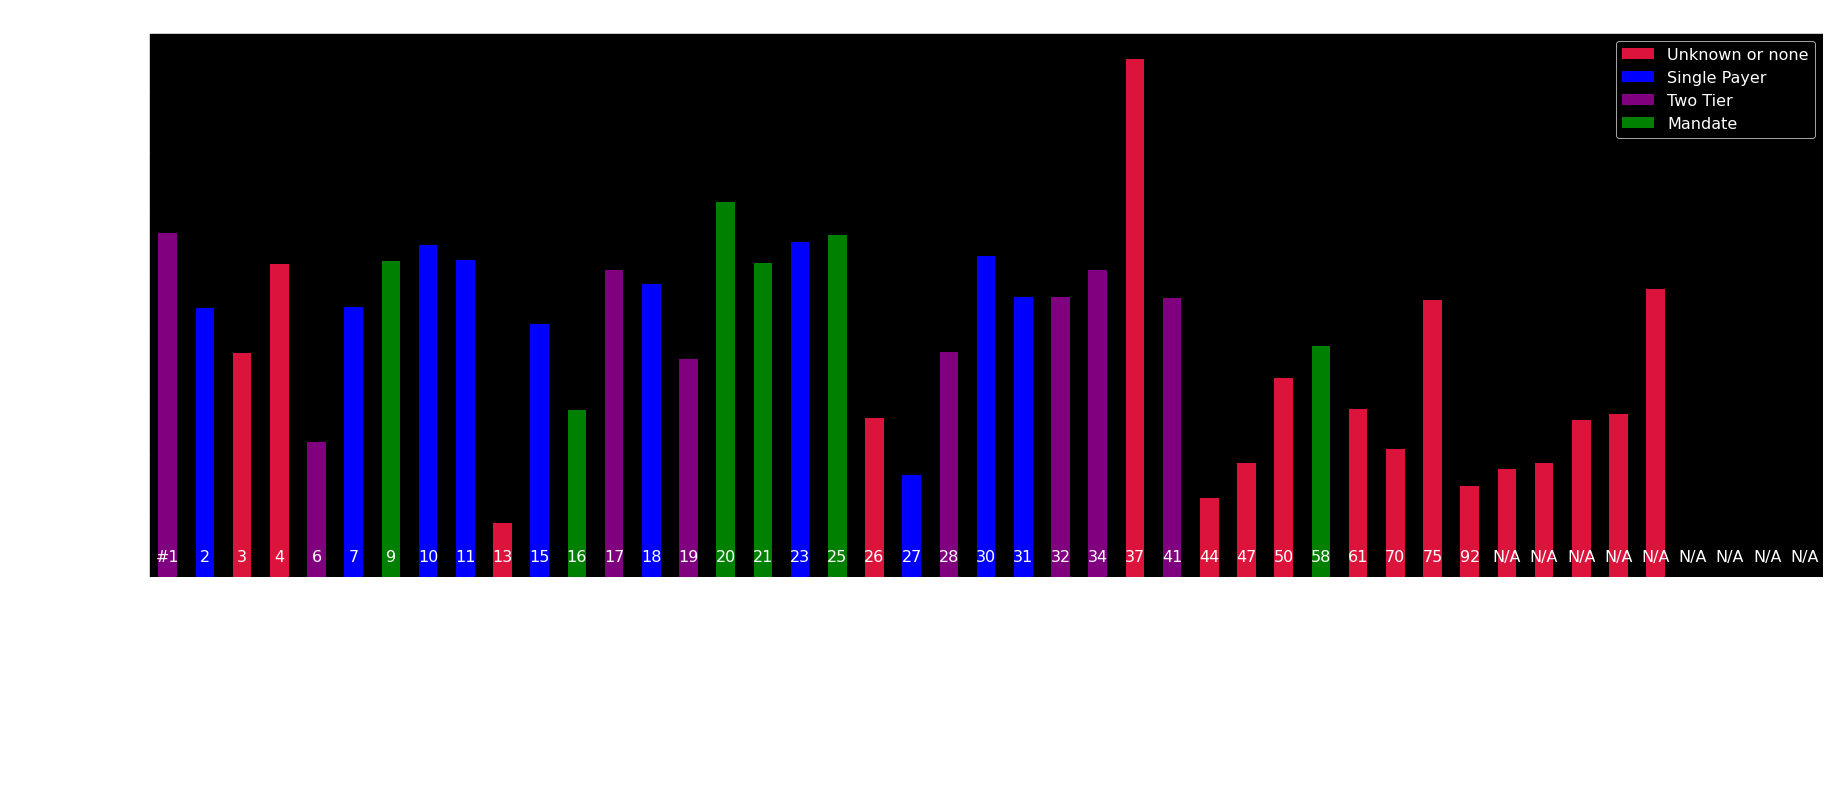

In [ ]:
#create the second visual using the 2017 per gdp spending compared with the type of system and health ranking
#make a new dataframe with the necisary data
vis2_df = ranking 
vis2_df['2017 cost per GDP'] = per_gdp_spend['2017']
#drop additional rows
vis2_df=vis2_df.drop(['GDP total rank','GDP per capita Rank','year achieved universal health care','population 2020'],axis=1)
# Sort by health ranking
vis2_df = vis2_df.sort_values(by=['healthcare Rank','2017 cost per GDP'],axis=0,na_position='last')
vis2_df.head()
#initialize graph
#set grouping colors for the various bars
colors = {0:'crimson', 1:'blue', 2:'purple',3:'green'}
vis2_df.plot(kind='bar',x='Country Name',y='2017 cost per GDP',color=vis1_df['Type of system'].replace(colors)).legend([Patch(facecolor=colors[0]),Patch(facecolor=colors[1]),Patch(facecolor=colors[2]),Patch(facecolor=colors[3])], ['Unknown or none', 'Single Payer','Two Tier','Mandate'],fontsize=16)
# Resizing the graph to make it ledgible
plt.rcParams["figure.figsize"] = (30,10)
# Labeling the rank of each country
plt.text(x=-1,y=.5,s='Health Ranking',horizontalalignment='right', fontsize=16)
plt.text(x=0,y=.5,s='#1',horizontalalignment='center', fontsize=16)
plt.text(x=1,y=.5,s='2',horizontalalignment='center', fontsize=16)
plt.text(x=2,y=.5,s='3',horizontalalignment='center', fontsize=16)
plt.text(x=3,y=.5,s='4',horizontalalignment='center', fontsize=16)
plt.text(x=4,y=.5,s='6',horizontalalignment='center', fontsize=16)
plt.text(x=5,y=.5,s='7',horizontalalignment='center', fontsize=16)
plt.text(x=6,y=.5,s='9',horizontalalignment='center', fontsize=16)
plt.text(x=7,y=.5,s='10',horizontalalignment='center', fontsize=16)
plt.text(x=8,y=.5,s='11',horizontalalignment='center', fontsize=16)
plt.text(x=9,y=.5,s='13',horizontalalignment='center', fontsize=16)
plt.text(x=10,y=.5,s='15',horizontalalignment='center', fontsize=16)
plt.text(x=11,y=.5,s='16',horizontalalignment='center', fontsize=16)
plt.text(x=12,y=.5,s='17',horizontalalignment='center', fontsize=16)
plt.text(x=13,y=.5,s='18',horizontalalignment='center', fontsize=16)
plt.text(x=14,y=.5,s='19',horizontalalignment='center', fontsize=16)
plt.text(x=15,y=.5,s='20',horizontalalignment='center', fontsize=16)
plt.text(x=16,y=.5,s='21',horizontalalignment='center', fontsize=16)
plt.text(x=17,y=.5,s='23',horizontalalignment='center', fontsize=16)
plt.text(x=18,y=.5,s='25',horizontalalignment='center', fontsize=16)
plt.text(x=19,y=.5,s='26',horizontalalignment='center', fontsize=16)
plt.text(x=20,y=.5,s='27',horizontalalignment='center', fontsize=16)
plt.text(x=21,y=.5,s='28',horizontalalignment='center', fontsize=16)
plt.text(x=22,y=.5,s='30',horizontalalignment='center', fontsize=16)
plt.text(x=23,y=.5,s='31',horizontalalignment='center', fontsize=16)
plt.text(x=24,y=.5,s='32',horizontalalignment='center', fontsize=16)
plt.text(x=25,y=.5,s='34',horizontalalignment='center', fontsize=16)
plt.text(x=26,y=.5,s='37',horizontalalignment='center', fontsize=16)
plt.text(x=27,y=.5,s='41',horizontalalignment='center', fontsize=16)
plt.text(x=28,y=.5,s='44',horizontalalignment='center', fontsize=16)
plt.text(x=29,y=.5,s='47',horizontalalignment='center', fontsize=16)
plt.text(x=30,y=.5,s='50',horizontalalignment='center', fontsize=16)
plt.text(x=31,y=.5,s='58',horizontalalignment='center', fontsize=16)
plt.text(x=32,y=.5,s='61',horizontalalignment='center', fontsize=16)
plt.text(x=33,y=.5,s='70',horizontalalignment='center', fontsize=16)
plt.text(x=34,y=.5,s='75',horizontalalignment='center', fontsize=16)
plt.text(x=35,y=.5,s='92',horizontalalignment='center', fontsize=16)
plt.text(x=36,y=.5,s='N/A',horizontalalignment='center', fontsize=16)
plt.text(x=37,y=.5,s='N/A',horizontalalignment='center', fontsize=16)
plt.text(x=38,y=.5,s='N/A',horizontalalignment='center', fontsize=16)
plt.text(x=39,y=.5,s='N/A',horizontalalignment='center', fontsize=16)
plt.text(x=40,y=.5,s='N/A',horizontalalignment='center', fontsize=16)
plt.text(x=41,y=.5,s='N/A',horizontalalignment='center', fontsize=16)
plt.text(x=42,y=.5,s='N/A',horizontalalignment='center', fontsize=16)
plt.text(x=43,y=.5,s='N/A',horizontalalignment='center', fontsize=16)
plt.text(x=44,y=.5,s='N/A',horizontalalignment='center', fontsize=16)
#labeling graph
plt.ylabel('% of GDP spent on Health',fontsize=20)
plt.xlabel('Country sorted from best to worst health rating',fontsize=20)
plt.title('Spending on health care as a percent of GDP',fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

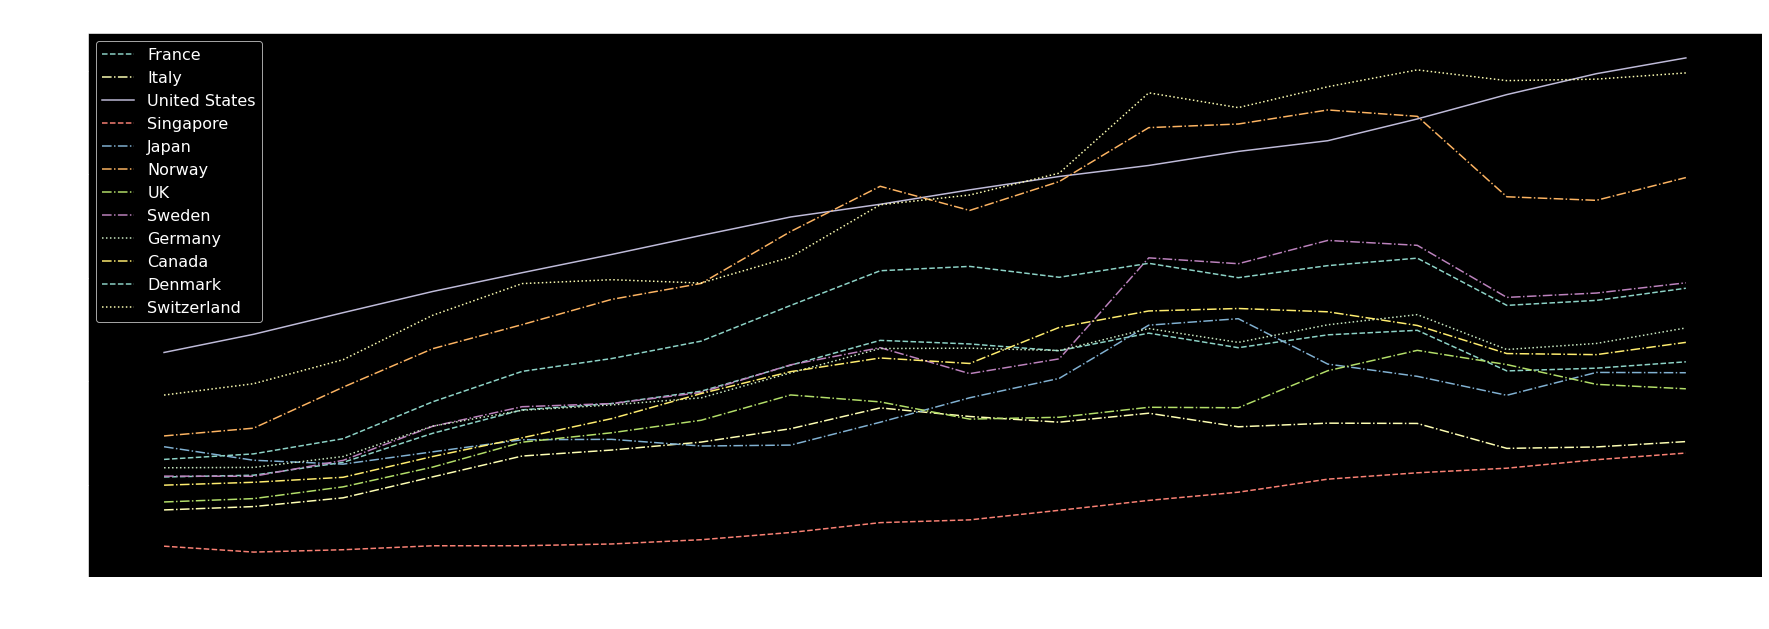

In [ ]:
#Setting up 3rd graph a line chart showing expenses
#reformate the data frame so that it can be read properly for graphing
#drop unnecesary columns and rows
per_cap_spend_plot = per_cap_spend.drop(['Country Code','Indicator Name','2018','2019','2020'],axis=1)
per_cap_spend_plot = per_cap_spend_plot.drop([7,13,14,24])
#reset index to the country names
per_cap_spend_plot = per_cap_spend_plot.set_index(per_cap_spend_plot['Country Name']) 
#drop the now redundent names column
per_cap_spend_plot = per_cap_spend_plot.drop('Country Name',axis=1)
#transpose the data frame so it can be read the right way
per_cap_spend_plot = per_cap_spend_plot.T
#plot the selected countries
fig, ax = plt.subplots()
ax.plot(per_cap_spend_plot['France'],'--',label='France')
ax.plot(per_cap_spend_plot['Italy'],'-.',label='Italy')
ax.plot(per_cap_spend_plot['United States'],label='United States')
ax.plot(per_cap_spend_plot['Singapore'],'--',label='Singapore')
ax.plot(per_cap_spend_plot['Japan'],'-.',label='Japan')
ax.plot(per_cap_spend_plot['Norway'],'-.',label='Norway')
ax.plot(per_cap_spend_plot['United Kingdom'],'-.',label='UK')
ax.plot(per_cap_spend_plot['Sweden'],'-.',label='Sweden')
ax.plot(per_cap_spend_plot['Germany'],':',label='Germany')
ax.plot(per_cap_spend_plot['Canada'],'-.',label='Canada')
ax.plot(per_cap_spend_plot['Denmark'],'--',label='Denmark')
ax.plot(per_cap_spend_plot['Switzerland'],':',label='Switzerland')
#create a Legend
leg = ax.legend(loc = 'upper left',fontsize=16)
#labeling my graphs and axis
plt.ylabel('US$ spent on health care',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Spending on health care per capita basis each year',fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

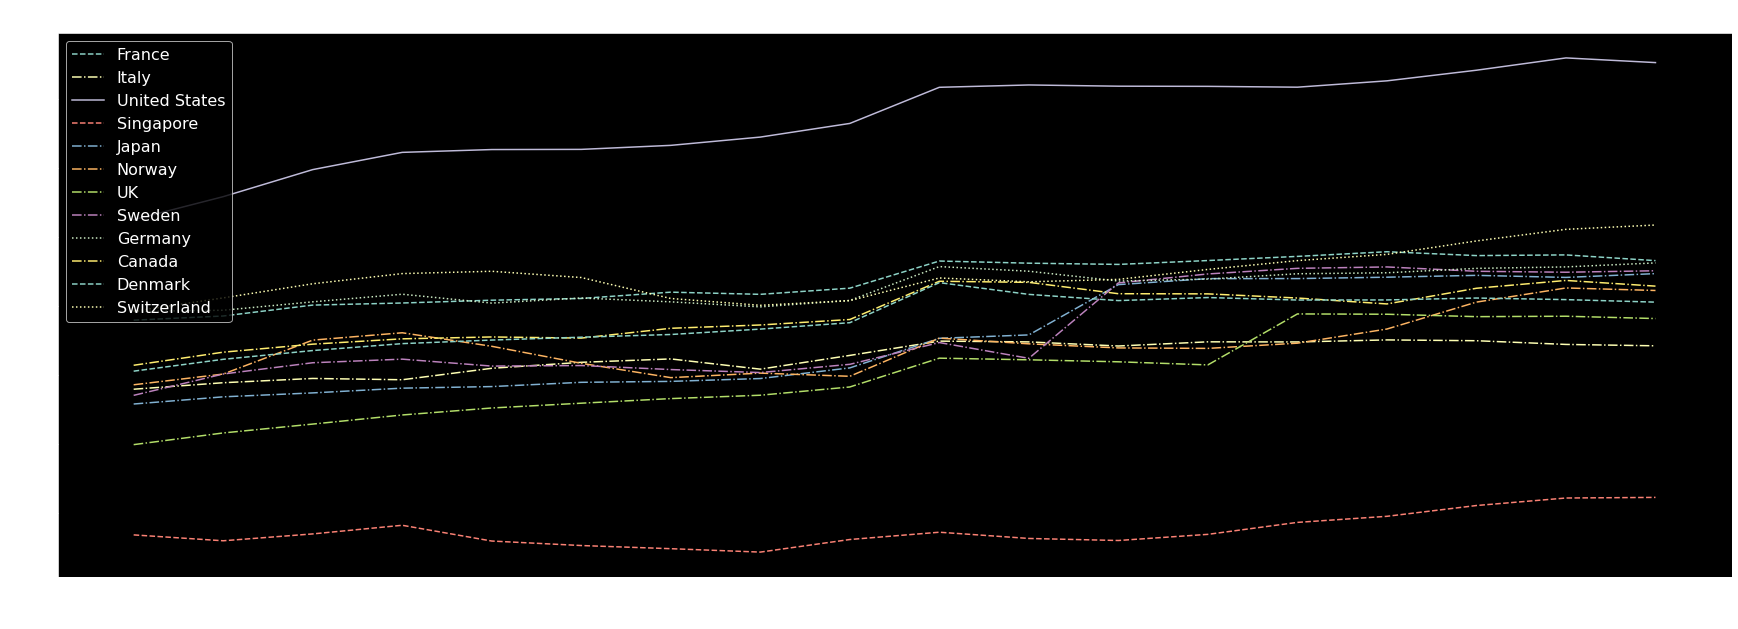

In [ ]:
#Setting up 3rd graph a line chart showing expenses
#reformate the data frame so that it can be read properly for graphing
#drop unnecesary columns and rows
per_gdp_spend_plot = per_gdp_spend.drop(['Country Code','Indicator Name','2018','2019','2020'],axis=1)
per_gdp_spend_plot = per_gdp_spend_plot.drop([7,13,14,24])
#reset index to the country names
per_gdp_spend_plot = per_gdp_spend_plot.set_index(per_gdp_spend_plot['Country Name']) 
#drop the now redundent names column
per_gdp_spend_plot = per_gdp_spend_plot.drop('Country Name',axis=1)
#transpose the data frame so it can be read the right way
per_gdp_spend_plot = per_gdp_spend_plot.T
#plot selected countries
fig, ax = plt.subplots()
ax.plot(per_gdp_spend_plot['France'],'--',label='France')
ax.plot(per_gdp_spend_plot['Italy'],'-.',label='Italy')
ax.plot(per_gdp_spend_plot['United States'],label='United States')
ax.plot(per_gdp_spend_plot['Singapore'],'--',label='Singapore')
ax.plot(per_gdp_spend_plot['Japan'],'-.',label='Japan')
ax.plot(per_gdp_spend_plot['Norway'],'-.',label='Norway')
ax.plot(per_gdp_spend_plot['United Kingdom'],'-.',label='UK')
ax.plot(per_gdp_spend_plot['Sweden'],'-.',label='Sweden')
ax.plot(per_gdp_spend_plot['Germany'],':',label='Germany')
ax.plot(per_gdp_spend_plot['Canada'],'-.',label='Canada')
ax.plot(per_gdp_spend_plot['Denmark'],'--',label='Denmark')
ax.plot(per_gdp_spend_plot['Switzerland'],':',label='Switzerland')
# Create the Legend
leg = ax.legend(loc = 'upper left',fontsize=16)
#labeling my graphs and axis
plt.ylabel('% of GDP spent on health care',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Spending on health care as a portion of GDP each year',fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()